<a href="https://colab.research.google.com/github/ecarletti/PDyTRCarlettiFinal/blob/main/Monografia_Mate_IV_Carletti_Ezequiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descomposición en Valores Singulares - Monografia Mate IV -  Carletti Ezequiel

**Introducción**

En la actualidad, el análisis de grandes cantidades de datos y la resolución de problemas matemáticos complejos son desafíos centrales en el campo de la informática. La manipulación de datos en forma matricial es particularmente importante en áreas como el procesamiento de imágenes, la minería de datos, el aprendizaje automático y los sistemas de recomendación. Para abordar estos problemas de manera eficiente, se requieren herramientas matemáticas que permitan descomponer, analizar y reducir matrices grandes y complejas sin perder la información más relevante.

Una de las herramientas más poderosas para este propósito es la **Descomposición en Valores Singulares** (SVD, por sus siglas en inglés), un método clave en el álgebra lineal que permite descomponer una matriz en tres matrices que revelan propiedades fundamentales de la matriz original. La SVD ha encontrado aplicaciones en una amplia gama de campos dentro de la informática, tales como la compresión de imágenes, la reducción de dimensionalidad en grandes bases de datos, y la mejora en la precisión de sistemas de recomendación.

**Resumen:** El objetivo de esta monografía es explorar en la teoría detrás de la Descomposición en Valores Singulares, así como los algoritmos que permiten su cálculo y las aplicaciones más comunes en la informática. En las secciones siguientes, se presentan los fundamentos teóricos necesarios para comprender la SVD, se explican su formulación matemática y algunos algoritmos numéricos, como una seccion mas detallada de transformaciones lineales. Finalmente, se ilustrarán aplicaciones prácticas de la SVD en problemas informáticos relevantes, como la compresión de imágenes.

## 2. Fundamentos Teóricos

Para entender la Descomposición en Valores Singulares (SVD), es importante pasar por algunos conceptos fundamentales del álgebra lineal que son esenciales en su formulación. En esta sección, se abordan los conceptos de vectores, matrices, autovalores, autovectores, así como algunas propiedades clave que serán utilizadas más adelante.

### 2.1. Vectores y Espacios Vectoriales

Un vector es una entidad matemática que puede visualizarse como un conjunto ordenado de números, generalmente representado como una columna o una fila de valores. Los vectores se utilizan para representar puntos en un espacio multidimensional o para describir la dirección y magnitud de una transformación. En un espacio vectorial, los vectores pueden sumarse y multiplicarse por escalares (números reales), satisfaciendo propiedades como la asociatividad y conmutatividad.

Matemáticamente, un vector en un espacio vectorial $\mathbb{R}^n$ es un objeto del tipo:

$$
\mathbf{v} = \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{pmatrix}
$$

donde $v_1, v_2, \dots, v_n$ son los componentes del vector. Los espacios vectoriales están definidos por un conjunto de reglas que permiten operaciones como la adición de vectores y la multiplicación por un escalar.

### 2.2. Matrices y Operaciones Matriciales

Una matriz es un arreglo bidimensional de números dispuestos en filas y columnas. Formalmente, una matriz de dimensión $m \times n$ se representa como:

$$
A = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{pmatrix}
$$

donde cada elemento $a_{ij}$ es un número real o complejo. Las matrices pueden representar transformaciones lineales, y las operaciones matriciales como la suma, la multiplicación, y la transposición juegan un papel central en el álgebra lineal.

Entre las operaciones básicas se incluyen:

- **Multiplicación de matrices**: Dada una matriz $A$ de dimensiones $m \times n$ y una matriz $B$ de dimensiones $n \times p$, el producto de $A$ y $B$ resulta en una matriz $C$ de dimensiones $m \times p$:

$$
C = A \cdot B
$$

donde cada entrada $c_{ij}$ de $C$ se calcula como el producto punto entre la fila $i$ de $A$ y la columna $j$ de $B$.

- **Transpuesta de una matriz**: La transposición de una matriz implica intercambiar las filas y columnas de la matriz. Si $A$ es una matriz de dimensión $m \times n$, entonces la transpuesta $A^T$ es de dimensión $n \times m$ y se define como:

$$
(A^T)_{ij} = A_{ji}
$$

### 2.3. Autovalores y Autovectores

Los autovalores y autovectores son conceptos clave para comprender cómo las matrices transforman los vectores. Dada una matriz cuadrada $A$ de dimensiones $n \times n$, un vector no nulo $\mathbf{v}$ y un escalar $\lambda$, el vector $\mathbf{v}$ es un **autovector** de $A$ con un **autovalor** asociado $\lambda$ si se cumple:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

En otras palabras, $\mathbf{v}$ es un vector cuya dirección no cambia cuando se le aplica la transformación lineal representada por $A$, y $\lambda$ es el factor por el cual su magnitud se escala. Los autovalores y autovectores son importantes porque describen las direcciones principales de transformación de una matriz.

Para una matriz $A$, los autovalores se pueden encontrar resolviendo el polinomio característico:

$$
\text{det}(A - \lambda I) = 0
$$

donde $I$ es la matriz identidad y $\lambda$ es el autovalor. Los autovectores se calculan resolviendo el sistema de ecuaciones lineales asociado a cada autovalor.

### 2.4. Matrices Simétricas y Ortogonales

Una matriz es **simétrica** si es igual a su transpuesta, es decir:

$$
A = A^T
$$

Las matrices simétricas tienen propiedades especiales que facilitan su análisis. En particular, todas las matrices simétricas tienen autovalores reales y sus autovectores son ortogonales entre sí. Esta propiedad es útil para el cálculo de la SVD y otras descomposiciones matriciales.

Una matriz es **ortogonal** si sus columnas (o filas) forman un conjunto ortonormal, lo que significa que:

$$
A^T A = I
$$

donde $I$ es la matriz identidad. En el caso de la Descomposición en Valores Singulares, las matrices resultantes $U$ y $V$ son ortogonales, lo que significa que preservan las longitudes y ángulos en el espacio.

### 2.5. Producto Interno y Normas

El **producto interno** o **producto escalar** es una operación que toma dos vectores $\mathbf{u}$ y $\mathbf{v}$ y produce un número real. En $\mathbb{R}^n$, el producto interno de dos vectores $\mathbf{u}$ y $\mathbf{v}$ se define como:

$$
\mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^n u_i v_i
$$

El producto interno permite definir el concepto de **ángulo** entre vectores, así como el de **ortogonalidad** (cuando el producto interno entre dos vectores es cero).

Por otro lado, la **norma** de un vector es una medida de su magnitud o longitud, y se puede calcular utilizando el producto interno. La norma euclidiana de un vector $\mathbf{v}$ en $\mathbb{R}^n$ se define como:

$$
\|\mathbf{v}\| = \sqrt{\mathbf{v} \cdot \mathbf{v}} = \sqrt{\sum_{i=1}^n v_i^2}
$$

La norma también puede extenderse a matrices, donde la **norma de Frobenius** de una matriz $A$ es la raíz cuadrada de la suma de los cuadrados de todos sus elementos:

$$
\|A\|_F = \sqrt{\sum_{i,j} |a_{ij}|^2}
$$

### 2.6. Rango de una Matriz

El **rango** de una matriz es el número de columnas o filas linealmente independientes. En términos prácticos, el rango de una matriz nos indica la dimensión del espacio generado por las columnas (o filas) de la matriz. El rango es importante en la Descomposición en Valores Singulares porque los valores singulares nos proporcionan una manera de determinar el rango de la matriz original.


## 2.7 Transformaciones Lineales

Las **transformaciones lineales** son funciones entre espacios vectoriales que respetan dos operaciones fundamentales: la **suma de vectores** y la **multiplicación por un escalar**. En otras palabras, una transformación lineal mantiene la estructura lineal del espacio vectorial. Este concepto es central en álgebra lineal y tiene múltiples aplicaciones en áreas como la geometría, la física, y las ciencias computacionales.

### 2.7.1 Definición de Transformación Lineal

Sea $T: V \to W$ una función entre dos espacios vectoriales $V$ y $W$. Se dice que $T$ es una **transformación lineal** si para todo $\mathbf{u}, \mathbf{v} \in V$ y $\lambda \in \mathbb{R}$, se cumplen las siguientes propiedades:

1. **Preservación de la suma de vectores:**
   $$
   T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v})
   $$
2. **Preservación de la multiplicación por escalares:**
   $$
   T(\lambda \mathbf{u}) = \lambda T(\mathbf{u})
   $$

Estas propiedades aseguran que la operación lineal en el espacio vectorial de partida se mantiene cuando se aplica la transformación, lo que implica que las combinaciones lineales de los vectores se conservan bajo $T$.

### 2.7.2. Ejemplos de Transformaciones Lineales

1. **Rotación en el plano**: La rotación de un vector en $\mathbb{R}^2$ alrededor del origen por un ángulo $\theta$ es un ejemplo clásico de una transformación lineal. La matriz asociada a una rotación en el plano es:
   $$
   R_\theta = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}
   $$
   Si aplicamos esta matriz a un vector $\mathbf{v} = (x, y)$, obtenemos el vector rotado.

2. **Escalamiento**: Multiplicar un vector por un escalar en $\mathbb{R}^n$ también es una transformación lineal. La matriz asociada a un escalamiento por un factor $k$ en todas las direcciones en $\mathbb{R}^2$ es:
   $$
   S_k = \begin{pmatrix} k & 0 \\ 0 & k \end{pmatrix}
   $$

3. **Proyección**: La proyección de un vector sobre una línea o un plano también es una transformación lineal. Por ejemplo, la proyección sobre el eje $x$ en $\mathbb{R}^2$ tiene la matriz:
   $$
   P_x = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
   $$

### 2.7.3. Representación Matricial de las Transformaciones Lineales

Toda transformación lineal puede representarse mediante una matriz. Si $T: \mathbb{R}^n \to \mathbb{R}^m$ es una transformación lineal, entonces existe una matriz $A \in \mathbb{R}^{m \times n}$ tal que:
$$
T(\mathbf{x}) = A \mathbf{x}
$$
para todo vector $\mathbf{x} \in \mathbb{R}^n$. En este contexto, la transformación $T$ es equivalente a la multiplicación del vector $\mathbf{x}$ por la matriz $A$.

*Ejemplo*

Una transformación lineal $T: \mathbb{R}^2 \to \mathbb{R}^2$ que escala un vector por un factor de $2$ en la dirección $x$ y lo deja invariante en la dirección $y$. La matriz asociada a esta transformación es:
$$
A = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}
$$
Aplicando $A$ a un vector $\mathbf{x} = (x, y)$, se obtiene:
$$
T(\mathbf{x}) = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2x \\ y \end{pmatrix}
$$

### 2.7.4. Núcleo e Imagen de una Transformación Lineal

Dadas las propiedades de una transformación lineal, se analiza dos subespacios importantes asociados a $T$: el **núcleo** y la **imagen**.

- **Núcleo**: El núcleo de una transformación lineal $T: V \to W$, denotado como $Nu(T)$, es el conjunto de todos los vectores en $V$ que se transforman en el vector cero en $W$:
  $$
  Nu(T) = \{\mathbf{v} \in V : T(\mathbf{v}) = \mathbf{0}\}
  $$
  El núcleo  da información sobre los vectores que son "aplastados" por la transformación.

- **Imagen**: La imagen de $T$, denotada como $\text{Im}(T)$, es el conjunto de todos los vectores en $W$ que son imágenes de algún vector en $V$:
  $$
  \text{Im}(T) = \{T(\mathbf{v}) : \mathbf{v} \in V\}
  $$
  La imagen describe el subespacio generado por las transformaciones de los vectores de $V$.

*Ejemplo de Núcleo e Imagen*

Considerando la transformación $T: \mathbb{R}^2 \to \mathbb{R}^2$ definida por la matriz:
$$
A = \begin{pmatrix} 1 & 2 \\ 0 & 0 \end{pmatrix}
$$
1. **Núcleo**: Resolviendo $A \mathbf{x} = \mathbf{0}$ se obtiene el sistema:
   $$
   x_1 + 2x_2 = 0, \quad 0 = 0
   $$
   Lo que implica que $x_1 = -2x_2$. Así, el núcleo es:
   $$
   Nu(T) = \text\{(-2, 1)\}
   $$

2. **Imagen**: Las columnas de $A$ generan la imagen de la transformación. Como la segunda fila es nula, la imagen está contenida en una línea a lo largo del eje $x$:
   $$
   \text{Im}(T) = \text\{(1, 0)\}
   $$

### 2.7.5. Teorema de la Dimensión

El **teorema de la dimensión** es un resultado fundamental en álgebra lineal que relaciona el núcleo y la imagen de una transformación lineal con la dimensión del espacio vectorial de partida.

Este teorema establece que para una transformación lineal $T: V \to W$, se cumple:
$$
\dim(V) = \dim(Nu(T)) + \dim(\text{Im}(T))
$$

Este resultado permite descomponer el espacio vectorial de partida en dos partes: una correspondiente a los vectores que son mapeados al vector cero (el núcleo) y otra correspondiente a los vectores que son mapeados a la imagen.

### 2.7.6. Matrices de Transformaciones Lineales en Diferentes Bases

El comportamiento de una transformación lineal depende de la base en la que se represente. Si se modifica la base de los espacios vectoriales de partida y llegada, la representación matricial de la transformación cambiará, pero las propiedades geométricas y algebraicas de la transformación se mantendrán.

#### Cambio de Base

Si $A$ es la matriz de la transformación $T$ en una base canónica y $P$ es una matriz de cambio de base en $V$, la matriz de $T$ en una nueva base es:
$$
A' = P^{-1} A P
$$

### 2.7.7. Relación entre Transformaciones Lineales y la Descomposición en Valores Singulares (SVD)

La **Descomposición en Valores Singulares (SVD)** es una herramienta clave en álgebra lineal que generaliza la diagonalización de matrices a matrices rectangulares. Toda matriz $A \in \mathbb{R}^{m \times n}$, que representa una transformación lineal entre dos espacios vectoriales, puede descomponerse en tres matrices:

$$
A = U \Sigma V^T
$$

Donde:
- $U \in \mathbb{R}^{m \times m}$ y $V \in \mathbb{R}^{n \times n}$ son matrices ortogonales que representan bases ortogonales en los espacios de partida y llegada.
- $\Sigma$ es una matriz diagonal con los **valores singulares** de $A$ en su diagonal.

La SVD revela cómo una transformación lineal estira o comprime el espacio en diferentes direcciones, y es útil en la reducción de dimensionalidad, la resolución de sistemas de ecuaciones, y otras aplicaciones avanzadas como el procesamiento de imágenes y la regresión en estadística.

### 2.7.8. Conclusión

Las transformaciones lineales son fundamentales para comprender la estructura y las operaciones en espacios vectoriales. A través de su representación matricial, se analiza transformaciones de manera algebraica y computacional. Además, la **Descomposición en Valores Singulares (SVD)** es una extensión natural de las transformaciones lineales, proporcionando una forma de descomponer cualquier transformación en una secuencia de rotaciones, escalamientos y proyecciones. Esta conexión entre las transformaciones lineales y la SVD es esencial en muchas aplicaciones modernas, como la reducción de dimensionalidad en datos y la optimización en problemas numéricos, entre otros que se ven en la siguiente seccion.

*(Ver ejercitacion/teoria manual en hojas: [10 a 18 hojas escritas.pdf](https://drive.google.com/file/d/1amLkpnfJDWlIkzOEvPEbAm8gEMXk7XfU/view?usp=sharing))*

### 2.7.9 Ejemplos y validacion con python.

### a. Cálculo de la Imagen de una Transformación Lineal

La **imagen** de una transformación lineal es el conjunto de todos los vectores que pueden ser alcanzados aplicando la transformación a los vectores del espacio original. Matemáticamente, la imagen está generada por las **columnas** de la matriz asociada a la transformación.

Para la matriz $A$ dada:

$$
A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 0 & 0 & 1 \end{pmatrix}
$$

Las columnas de esta matriz son los vectores:

$$
\mathbf{a}_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad \mathbf{a}_2 = \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix}, \quad \mathbf{a}_3 = \begin{pmatrix} 3 \\ 4 \\ 1 \end{pmatrix}
$$

Para encontrar la **imagen**, necesitamos verificar si las columnas de $A$ son **linealmente independientes**. Esto se puede hacer calculando el **determinante** de la matriz $A$:

$$
\text{det}(A) = \text{det} \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 0 & 0 & 1 \end{pmatrix} = 1
$$

El determinante de esta matriz se calcula como:

$$
\text{det}(A) = 1(1 \cdot 1 - 4 \cdot 0) - 2(0 \cdot 1 - 4 \cdot 0) + 3(0 \cdot 1 - 0 \cdot 0) = 1
$$

Como el determinante es distinto de cero, podemos concluir que las columnas de $A$ son linealmente independientes, lo que significa que forman una **base de $\mathbb{R}^3$**. Por lo tanto, la imagen de la transformación es todo el espacio $\mathbb{R}^3$.

#### *Determinante*

El **determinante** de una matriz cuadrada es un valor numérico que describe ciertas propiedades de la matriz. Si el determinante de una matriz es **diferente de cero**, las columnas de la matriz son **linealmente independientes**. Si el determinante es **cero**, las columnas son **linealmente dependientes**, lo que significa que al menos una columna es una combinación lineal de las otras.

Para una matriz cuadrada $A$, su determinante $\text{det}(A)$ se calcula de la siguiente manera:

##### Para una matriz de $2 \times 2$:

Si $A$ es una matriz de dimensión $2 \times 2$:

$$
A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}
$$

El determinante de $A$ se calcula como:

$$
\text{det}(A) = ad - bc
$$

##### Para una matriz de $3 \times 3$:

Si $A$ es una matriz de dimensión $3 \times 3$:

$$
A = \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \end{pmatrix}
$$

El determinante de $A$ se calcula como:

$$
\text{det}(A) = a(ei - fh) - b(di - fg) + c(dh - eg)
$$


---

### b. Cálculo del Núcleo de una Transformación Lineal

El **núcleo** de una transformación lineal es el conjunto de vectores que se transforman en el vector cero bajo la acción de la transformación. Esto significa resolver el siguiente sistema de ecuaciones:

Para la matriz $A$ dada:

$$
A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 0 & 0 & 1 \end{pmatrix}
$$

El sistema de ecuaciones es:

1. \$ ( x + 2y + 3z = 0 \$)
2. \$ ( y + 4z = 0 \$)
3. \$ ( z = 0 \$)

#### Paso a Paso

- A partir de la tercera ecuación, obtenemos \$ ( z = 0 \$).
- Sustituyendo \$ z = 0 \$ en la segunda ecuación, obtenemos:

  \$ ( y + 4(0) = 0 \quad \Rightarrow \quad y = 0 \$)

- Finalmente, sustituyendo \$ y = 0 \$ y \$ z = 0 \$ en la primera ecuación, obtenemos:

  \$ ( x + 2(0) + 3(0) = 0 \quad \Rightarrow \quad x = 0 \$)

Por lo tanto, el único vector en el núcleo es \$ \mathbf{0} \$, es decir:

$$
\text{Núcleo}(T) = \{ \mathbf{0} \}
$$

---

#### c. Verificación de las Propiedades de Linealidad

Sea la matriz de transformación:

$$
A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 0 & 0 & 1 \end{pmatrix}
$$

Queremos verificar las dos propiedades fundamentales de las transformaciones lineales:

1. **Suma de vectores**: $ T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v}) $
2. **Multiplicación por escalar**: $ T(\lambda \mathbf{u}) = \lambda T(\mathbf{u}) $

Para los vectores:

$$
\mathbf{u} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad \mathbf{v} = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
$$

#### Paso a Paso: Suma de Vectores

1. Sumamos los vectores $ \mathbf{u} + \mathbf{v} $:
   $$
   \mathbf{u} + \mathbf{v} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
   $$

2. Aplicamos la transformación $ T(\mathbf{u} + \mathbf{v}) $:
   $$
   T(\mathbf{u} + \mathbf{v}) = A \cdot \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 3 \\ 1 \\ 0 \end{pmatrix}
   $$

3. Aplicamos la transformación a $ \mathbf{u} $ y $ \mathbf{v} $ individualmente:
   $$
   T(\mathbf{u}) = A \cdot \mathbf{u} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad T(\mathbf{v}) = A \cdot \mathbf{v} = \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix}
   $$

4. Verificamos que $ T(\mathbf{u}) + T(\mathbf{v}) $ es:
   $$
   T(\mathbf{u}) + T(\mathbf{v}) = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 3 \\ 1 \\ 0 \end{pmatrix}
   $$

Ambos resultados coinciden, por lo tanto, se cumple la propiedad de la suma de vectores.

#### Paso a Paso: Multiplicación por Escalar

Para $ \lambda = 2 $, verificamos la propiedad de la multiplicación por escalar.

1. Multiplicamos $ \mathbf{u} $ por $ \lambda $:
   $$
   2 \mathbf{u} = \begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix}
   $$

2. Aplicamos la transformación $ T(2 \mathbf{u}) $:
   $$
   T(2 \mathbf{u}) = A \cdot \begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix}
   $$

3. Verificamos que $ 2 T(\mathbf{u}) $ es:
   $$
   2 T(\mathbf{u}) = 2 \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix}
   $$

Ambos resultados coinciden, por lo tanto, se cumple la propiedad de la multiplicación por escalar.

### Validacion puntos a,b,c en codigo python


In [ ]:
import numpy as np
from scipy.linalg import null_space

# Matriz de transformación A
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [0, 0, 1]])

# a. Cálculo del rango de la matriz (Imagen)
rank = np.linalg.matrix_rank(A)
print(f"Rango de la matriz (dimensión de la imagen): {rank}\n")

# Las columnas de A forman una base para la imagen
image = A[:, :rank]  # Tomamos las columnas independientes
print("Base de la imagen (columnas independientes de A):")
print(image, "\n")

# b. Cálculo del núcleo (espacio nulo)
ker = null_space(A)
print("Núcleo de la transformación (A):")
if ker.size == 0:
    print("El núcleo solo contiene el vector cero.\n")
else:
    print(ker, "\n")

# c. Verificación de las propiedades de linealidad
# Definimos dos vectores u y v
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])

# Propiedad 1: Preservación de la suma de vectores
T_u_v = A @ (u + v)  # T(u + v)
T_u = A @ u          # T(u)
T_v = A @ v          # T(v)

print("Preservación de la suma de vectores:")
print(f"T(u + v): {T_u_v}")
print(f"T(u) + T(v): {T_u + T_v}\n")

# Propiedad 2: Preservación de la multiplicación por escalar
λ = 2
T_lambda_u = A @ (λ * u)  # T(λ * u)
lambda_T_u = λ * (A @ u)  # λ * T(u)

print("Preservación de la multiplicación por escalar:")
print(f"T(λ * u): {T_lambda_u}")
print(f"λ * T(u): {lambda_T_u}\n")

# 4. Cálculo del determinante
det_A = np.linalg.det(A)
print(f"Determinante de A: {det_A:.2f}\n")

# 5. Verificación de independencia lineal de las columnas
if det_A != 0:
    print("Las columnas de A son linealmente independientes.")
else:
    print("Las columnas de A son linealmente dependientes.")


Rango de la matriz (dimensión de la imagen): 3

Base de la imagen (columnas independientes de A):
[[1 2 3]
 [0 1 4]
 [0 0 1]] 

Núcleo de la transformación (A):
El núcleo solo contiene el vector cero.

Preservación de la suma de vectores:
T(u + v): [3 1 0]
T(u) + T(v): [3 1 0]

Preservación de la multiplicación por escalar:
T(λ * u): [2 0 0]
λ * T(u): [2 0 0]

Determinante de A: 1.00

Las columnas de A son linealmente independientes.


### Ejemplo: Visualización de la Transformación Lineal en $ \mathbb{R}^3 $

El siguiente ejemplo, se podra visualizar una **transformación lineal** aplicada a dos vectores $ \mathbf{u} $ y $ \mathbf{v} $ en el espacio $ \mathbb{R}^3 $. Utilizaremos una matriz de transformación que cambia las coordenadas de los vectores originales.

Dada la siguiente matriz:

$$
A = \begin{pmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
0 & 0 & 1
\end{pmatrix}
$$

Esta matriz aplica una transformación lineal a los vectores del espacio $ \mathbb{R}^3 $, lo que significa que multiplica los vectores originales por esta matriz para obtener los vectores transformados. La transformación afecta tanto la dirección como la magnitud de los vectores.

#### Vectores Originales:

Se parte de los vectores en el espacio $ \mathbb{R}^3 $:

$$
\mathbf{u} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad \mathbf{v} = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
$$

Estos vectores representan las direcciones de los ejes $ X $ y $ Y $, respectivamente.

#### Transformación de los vectores:

La transformación lineal aplicada a los vectores se realiza multiplicando la matriz $ A $ por cada vector. Los resultados de las transformaciones son los siguientes:

$$
T(\mathbf{u}) = A \cdot \mathbf{u} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad
T(\mathbf{v}) = A \cdot \mathbf{v} = \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix}
$$

El vector $ \mathbf{u} $ no cambia, mientras que $ \mathbf{v} $ es transformado a una nueva dirección, escalado y trasladado en el espacio.

#### Visualización:

El gráfico muestra dos subplots:

1. **Vectores Originales**: En este gráfico, los vectores $ \mathbf{u} $ y $ \mathbf{v} $ originales se dibujan en sus posiciones iniciales en $ \mathbb{R}^3 $, representados en azul y verde, respectivamente.

2. **Vectores Transformados**: En el segundo gráfico, se muestran los vectores después de aplicar la transformación lineal. El vector $ T(\mathbf{u}) $ aparece en rojo (sin cambios), mientras que $ T(\mathbf{v}) $ se muestra en naranja, reflejando su nueva posición en el espacio tridimensional.

Este ejercicio permite visualizar cómo una transformación lineal puede cambiar la orientación y magnitud de los vectores en el espacio.


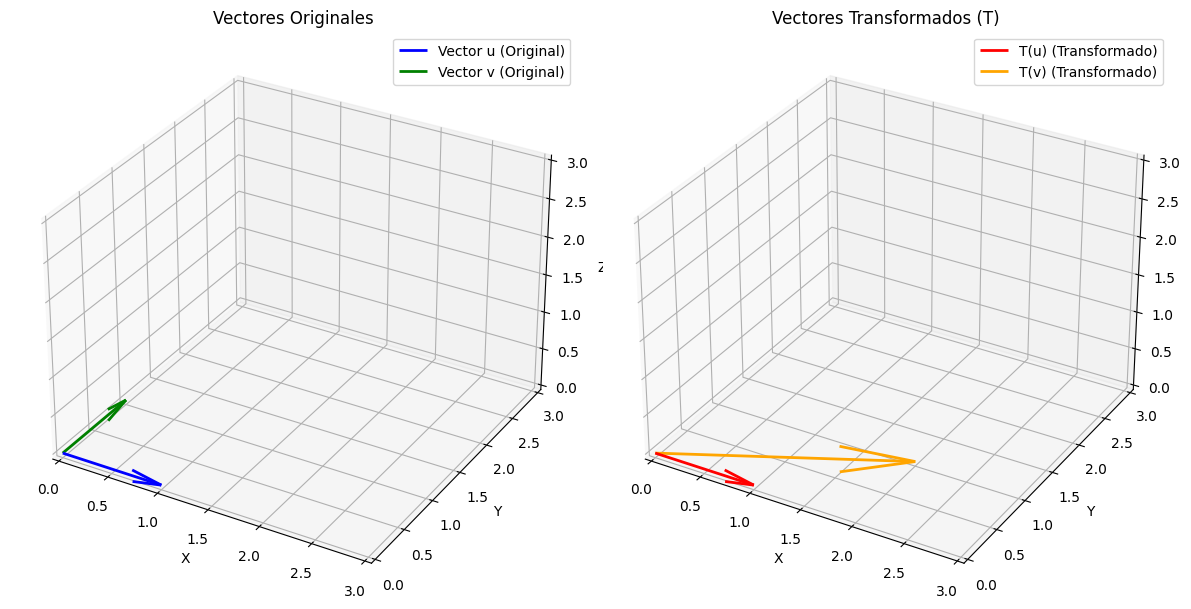

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz de transformación A
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [0, 0, 1]])

# Definimos los vectores originales u y v en R^3
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])

# Transformamos los vectores bajo la matriz A
T_u = A @ u
T_v = A @ v

# Crear gráficos
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Vectores originales
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("Vectores Originales")
ax1.quiver(0, 0, 0, u[0], u[1], u[2], color='blue', label='Vector u (Original)', linewidth=2)
ax1.quiver(0, 0, 0, v[0], v[1], v[2], color='green', label='Vector v (Original)', linewidth=2)

# Configuración del gráfico original
ax1.set_xlim([0, 3])
ax1.set_ylim([0, 3])
ax1.set_zlim([0, 3])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Subplot 2: Vectores transformados
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Vectores Transformados (T)")

# Grafico de los vectores transformados bajo T
ax2.quiver(0, 0, 0, T_u[0], T_u[1], T_u[2], color='red', label='T(u) (Transformado)', linewidth=2)
ax2.quiver(0, 0, 0, T_v[0], T_v[1], T_v[2], color='orange', label='T(v) (Transformado)', linewidth=2)

# Configuración del gráfico transformado
ax2.set_xlim([0, 3])
ax2.set_ylim([0, 3])
ax2.set_zlim([0, 3])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### Ejemplo: Aplicación de la Transformación Lineal con la Matriz A

Para la matriz de transformación \( A \):

$$
A = \begin{pmatrix} 3 & 0 \\ 4 & 5 \end{pmatrix}
$$

Aplicamos esta matriz a cuatro vectores en el plano \( (p, q) \). Los vectores que utilizaremos son:

1. $ (1, 0) $
2. $ (0, 1) $
3. $ (-1, 0) $
4. $ (0, -1) $

### Aplicación de la transformación:

Multiplicamos la matriz $ A $ por cada uno de los vectores.
El resultado es el siguiente:

| $ (p, q) $  | $ A(p, q) = (3p + 0q, 4p + 5q) $ | Resultado |
|:--------------:|:-------------------------------------------:|:-----------:|
| $ (1, 0) $   | $ (3 \cdot 1 + 0 \cdot 0, 4 \cdot 1 + 5 \cdot 0) $ | $(3, 4) $ |
| $ (0, 1) $   | $ (3 \cdot 0 + 0 \cdot 1, 4 \cdot 0 + 5 \cdot 1) $ | $ (0, 5) $  |
| $ (-1, 0) $  | $ (3 \cdot (-1) + 0 \cdot 0, 4 \cdot (-1) + 5 \cdot 0) $ |$(-3, -4) $ |
| $ (0, -1) $  | $ (3 \cdot 0 + 0 \cdot (-1), 4 \cdot 0 + 5 \cdot (-1) $ | $ (0, -5) $ |




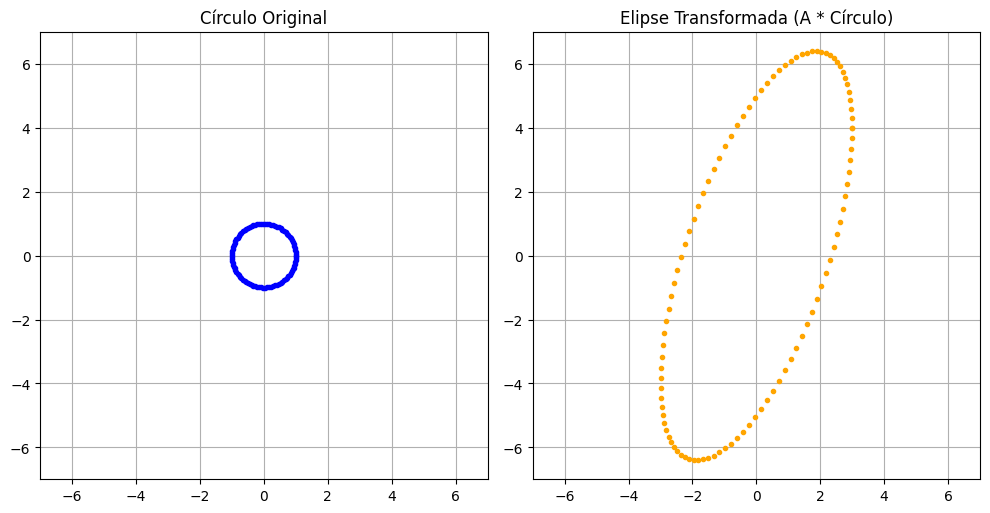

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la matriz de transformación A
A = np.array([[3, 0],
              [4, 5]])

# Definimos los puntos originales (p,q) que forman un círculo
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(theta)  # coordenadas x de los puntos del círculo
circle_y = np.sin(theta)  # coordenadas y de los puntos del círculo
circle_points = np.vstack([circle_x, circle_y])  # Matriz con todos los puntos (x, y)

# Aplicamos la transformación a cada punto
transformed_points = A @ circle_points

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: Círculo original
ax1.plot(circle_x, circle_y, 'o', color='blue', markersize=3)
ax1.set_xlim(-7, 7)
ax1.set_ylim(-7, 7)
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Círculo Original")

# Gráfico 2: Elipse Transformada
ax2.plot(transformed_points[0, :], transformed_points[1, :], 'o', color='orange', markersize=3)
ax2.set_xlim(-7, 7)
ax2.set_ylim(-7, 7)
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("Elipse Transformada (A * Círculo)")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


## 3. Descomposición en Valores Singulares (SVD)

La Descomposición en Valores Singulares (SVD, por sus siglas en inglés) es un método de factorización matricial que permite descomponer una matriz en tres componentes fundamentales: una matriz ortogonal, una matriz diagonal, y la transpuesta de otra matriz ortogonal. Esta descomposición es extremadamente útil en el análisis y manipulación de datos y tiene aplicaciones en una amplia variedad de campos, como la compresión de imágenes, la reducción de dimensionalidad, y los sistemas de recomendación.

### 3.1. Definición Formal de la SVD

Dada una matriz $A$ de dimensión $m \times n$, la SVD permite escribirla como el producto de tres matrices:

$$
A = U \Sigma V^T
$$

Donde:

- $U$ es una matriz ortogonal de dimensión $m \times m$.
- $\Sigma$ es una matriz diagonal de dimensión $m \times n$, cuyos elementos en la diagonal se denominan **valores singulares** de la matriz $A$.
- $V^T$ es la transpuesta de una matriz ortogonal $V$ de dimensión $n \times n$.

La descomposición en valores singulares siempre existe para cualquier matriz $A$, sin importar si es cuadrada o rectangular.

### 3.2. Propiedades de la SVD

La SVD tiene varias propiedades importantes que son útiles en diversas aplicaciones:

- **Ortogonalidad de $U$ y $V$**: Las matrices $U$ y $V$ son ortogonales, lo que significa que sus columnas forman bases ortonormales. Esto implica que:

$$
U^T U = I_m \quad \text{y} \quad V^T V = I_n
$$

donde $I_m$ y $I_n$ son las matrices identidad de dimensiones $m \times m$ y $n \times n$, respectivamente.

- **Valores Singulares**: Los elementos de la matriz diagonal $\Sigma$, conocidos como los valores singulares de $A$, son siempre números reales no negativos y están ordenados de mayor a menor:

$$
\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0
$$

donde $r$ es el rango de la matriz $A$. Estos valores singulares proporcionan una medida de la "fuerza" o magnitud de cada componente de la matriz $A$.

- **Rango de la Matriz**: El número de valores singulares no nulos de la matriz $A$ es igual al rango de la matriz.

- **Relación con los Autovalores**: Los valores singulares de $A$ son las raíces cuadradas de los autovalores de las matrices $A^T A$ y $A A^T$.

### 3.3. Interpretación Geométrica

Desde una perspectiva geométrica, la SVD puede interpretarse como una secuencia de transformaciones aplicadas a un espacio de vectores:

1. La matriz $V^T$ realiza una rotación o reflexión en el espacio de entrada.
2. La matriz $\Sigma$ realiza un escalamiento a lo largo de los ejes correspondientes a los vectores singulares.
3. Finalmente, la matriz $U$ realiza otra rotación o reflexión en el espacio de salida.

Estas transformaciones preservan la ortogonalidad de los vectores, y los valores singulares indican cómo se estiran o contraen los vectores en cada dirección.

### 3.4. Aplicación en la Aproximación de Matrices

Una de las aplicaciones más importantes de la SVD es la **aproximación de matrices**. Si se quieren aproximar los datos de una matriz $A$ usando solo los valores singulares más grandes, se puede construir una aproximación de rango bajo, eliminando los valores singulares más pequeños que contribuyen menos a la estructura de la matriz.

Sea $A_k$ una aproximación de rango $k$ de la matriz $A$:

$$
A_k = U_k \Sigma_k V_k^T
$$

donde $U_k$, $\Sigma_k$, y $V_k$ son las matrices truncadas que contienen solo los $k$ valores singulares más grandes. Esta aproximación es óptima en el sentido de que minimiza el error respecto a la norma de Frobenius:

$$
\| A - A_k \|_F
$$

Este método es ampliamente utilizado en aplicaciones de reducción de dimensionalidad y compresión de datos.




## 4. Algoritmos para Computar la SVD

Existen varios algoritmos para realizar esta tarea, cada uno con sus ventajas y desventajas. En esta sección, describimos los algoritmos más comunes, su complejidad computacional y su implementación en herramientas de software.

### 4.1. Algoritmo de la Potencia

El **algoritmo de la potencia** es un método iterativo que permite calcular el valor singular más grande y su vector singular asociado. Este algoritmo es relativamente sencillo, pero su convergencia es lenta en algunos casos.

El proceso consiste en aplicar repetidamente una matriz a un vector inicial aleatorio y normalizar el resultado en cada iteración:

1. Elige un vector inicial aleatorio $\mathbf{v}_0$.
2. Itera el siguiente paso:

$$
\mathbf{v}_{k+1} = \frac{A \mathbf{v}_k}{\| A \mathbf{v}_k \|}
$$

3. El algoritmo converge hacia el vector singular asociado al valor singular más grande.

Este algoritmo tiene una complejidad de $\mathcal{O}(mnk)$ para una matriz $A$ de dimensión $m \times n$ con $k$ iteraciones, lo que lo hace adecuado solo para encontrar el mayor valor singular y su vector singular correspondiente.

### 4.2. Algoritmo de Golub-Reinsch

El **algoritmo de Golub-Reinsch** es uno de los métodos más utilizados para calcular la SVD completa de una matriz. Este algoritmo sigue dos fases principales:

1. **Reducción a forma bidiagonal**: La matriz original $A$ se transforma en una matriz bidiagonal mediante transformaciones ortogonales. Una matriz bidiagonal tiene ceros en todos los elementos excepto en la diagonal principal y la subdiagonal.
   
2. **SVD de la matriz bidiagonal**: Una vez que la matriz está en forma bidiagonal, se aplica otro algoritmo para calcular la SVD de esta matriz más simple.

El algoritmo de Golub-Reinsch tiene una complejidad de $\mathcal{O}(mn^2)$ para una matriz de dimensiones $m \times n$, por lo que es adecuado para matrices de tamaño moderado.

### 4.3. Método de Jacobi

El **método de Jacobi** es otro algoritmo iterativo que se utiliza para calcular la SVD, especialmente cuando se busca una alta precisión en el cálculo de los valores singulares y vectores singulares. Este método es particularmente útil para matrices pequeñas o medianas, ya que es más lento que otros métodos pero ofrece una alta precisión.

El método de Jacobi se basa en aplicar una secuencia de rotaciones a la matriz original para llevarla a una forma diagonal. En cada iteración, se reduce el valor de los elementos fuera de la diagonal, hasta que la matriz se aproxima lo suficiente a una matriz diagonal.

Aunque el método de Jacobi es más preciso que el algoritmo de Golub-Reinsch, su complejidad es mayor, del orden de $\mathcal{O}(mn^2)$.

### 4.4. Complejidad Computacional de los Algoritmos

Calcular la SVD de una matriz puede ser computacionalmente costoso, especialmente para matrices grandes. La complejidad de los algoritmos varía según el método utilizado y el tamaño de la matriz. A continuación se resumen las complejidades de los principales algoritmos:

- **Algoritmo de la Potencia**: $\mathcal{O}(mnk)$, donde $k$ es el número de iteraciones.
- **Algoritmo de Golub-Reinsch**: $\mathcal{O}(mn^2)$.
- **Método de Jacobi**: $\mathcal{O}(mn^2)$.

Para matrices muy grandes y dispersas (sparse matrices), se utilizan versiones adaptadas de estos algoritmos que aprovechan la estructura dispersa de las matrices para reducir la complejidad.

### 4.5. Implementaciones en Software

Existen múltiples bibliotecas y lenguajes de programación que implementan de manera eficiente la SVD. A continuacion se muestra un ejemplo de una libreria que es utilizado mas adelante en el trabajo:

- **NumPy y SciPy en Python**: Estas bibliotecas ofrecen una implementación eficiente de la SVD. En NumPy, se puede calcular la SVD utilizando la función `numpy.linalg.svd()`:

```python
import numpy as np
A = np.random.rand(5, 3)
U, S, VT = np.linalg.svd(A)
```


In [ ]:
import numpy as np

#Se genera una matriz aleatoria con la funcion randomize
A = np.random.rand(5, 3)
U, S, VT = np.linalg.svd(A)

print("Matriz U:")
print(U)

print("\nValores singulares S:")
print(S)

print("\nMatriz V transpuesta:")
print(VT)

Matriz U:
[[-0.20843311  0.38855411  0.24783244 -0.10140145 -0.8566669 ]
 [-0.26385363  0.18608572 -0.92218826  0.16258627 -0.13743317]
 [-0.64394822 -0.09316047  0.00620489 -0.73175922  0.20283434]
 [-0.57507276 -0.57360736  0.1648347   0.54257274 -0.13678545]
 [-0.37624316  0.69042996  0.24685807  0.36527623  0.43287633]]

Valores singulares S:
[2.43111735 0.57701897 0.30022926]

Matriz V transpuesta:
[[-0.55231714 -0.56193256 -0.61577397]
 [-0.40018822  0.82670911 -0.39547621]
 [ 0.73129691  0.0279972  -0.6814844 ]]


## 5. Aplicaciones de la Descomposición en Valores Singulares (SVD)

La Descomposición en Valores Singulares (SVD) tiene una amplia variedad de aplicaciones en diferentes campos, desde la informática hasta el análisis de datos. Su capacidad para descomponer matrices en componentes fundamentales hace que sea una herramienta clave en áreas como la compresión de datos, la reducción de dimensionalidad y los sistemas de recomendación. A continuación, se explican algunas de las aplicaciones más comunes de la SVD.

### 5.1. Compresión de Imágenes

Una de las aplicaciones más prácticas de la SVD es en la **compresión de imágenes**. En esta aplicación, la SVD se utiliza para reducir el tamaño de los datos almacenados en una imagen manteniendo la mayor cantidad de información posible.

Dado que las imágenes pueden representarse como matrices de píxeles, la SVD nos permite descomponer una imagen en sus componentes principales. Luego, podemos truncar la descomposición manteniendo solo los valores singulares más grandes, que representan la mayor parte de la información visual. Esto permite reducir significativamente el tamaño de la imagen.

#### Ejemplo de Compresión de Imágenes con SVD en Python:

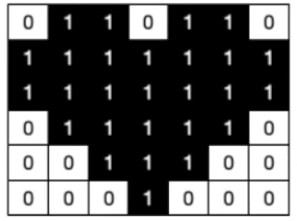

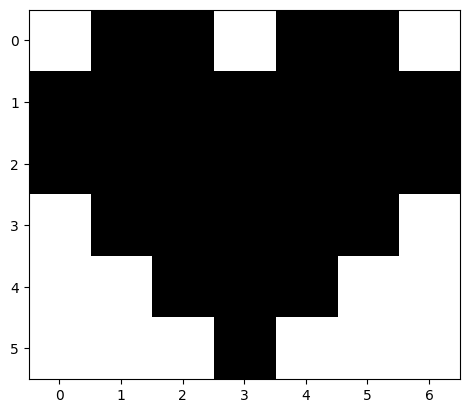

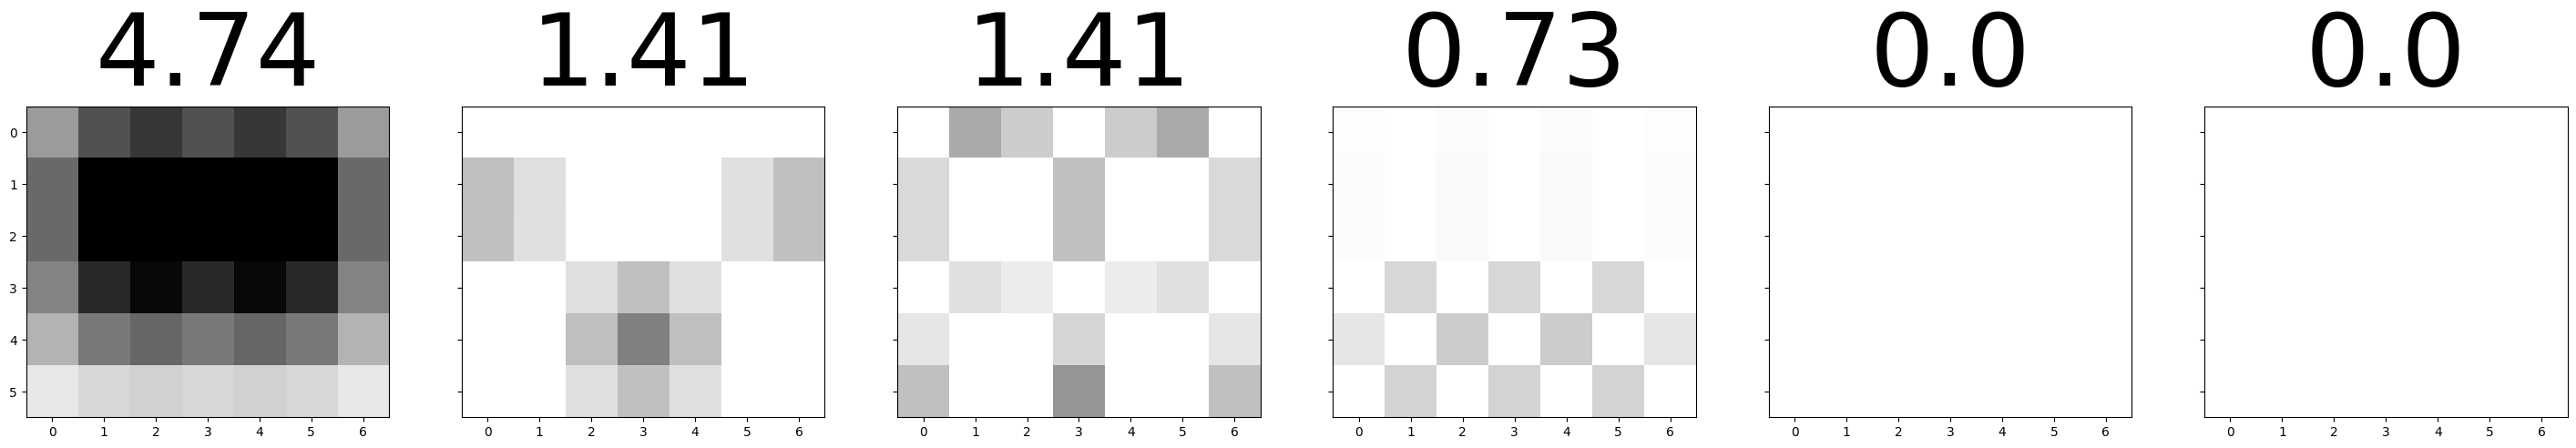

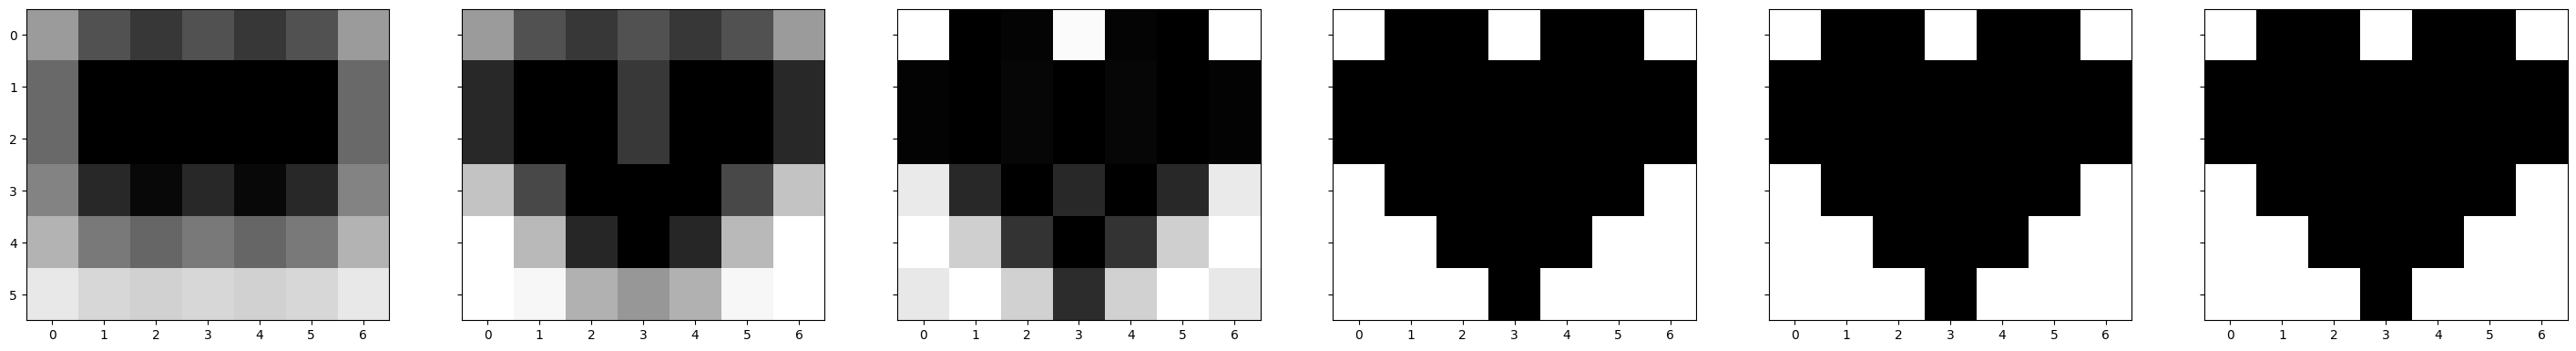

In [ ]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Parámetros para la visualización
vmin = 0
vmax = 1
image_bias = 1

# Función para graficar SVD
def plot_svd(A):
    n = len(A)

    # Graficar la matriz original
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    # Calcular SVD
    U, S, V = svd(A)

    imgs = []
    for i in range(n):
        # Crear cada componente singular
        imgs.append(S[i] * np.outer(U[:,i], V[i]))

    # Combinación de imágenes parciales
    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)

    # Graficar cada componente singular
    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num], 2), fontsize=80)
    plt.show()

    # Graficar la reconstrucción progresiva
    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U, S, V

# Matriz de la figura de corazón
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]])

# Aplicar la DVS a la matriz D
U, S, V = plot_svd(D)


### Detalle de reconstruccion de las matrices

$$
A = U \cdot S \cdot V^T
$$

A continuación, mostramos las tres matrices $ U $, $ S $ y $ V^T $ obtenidas a partir de una matriz binaria.

#### Matriz $ U $:

$$
U = \begin{pmatrix}
-0.36 & 0 & -0.73 & -0.05 & 0.56 & 0.13 \\
-0.54 & 0.35 & 0.27 & -0.08 & -0.16 & 0.69 \\
-0.54 & 0.35 & 0.27 & -0.08 & 0.16 & -0.69 \\
-0.45 & -0.35 & -0.27 & 0.52 & -0.56 & -0.13 \\
-0.28 & -0.71 & 0.18 & -0.62 & 0 & 0 \\
-0.08 & -0.35 & 0.46 & 0.57 & 0.56 & 0.13 \\
\end{pmatrix}
$$

#### Valores Singulares $ S $:
*(Rango 4, aunque el maximo sea 6)*

$$
S = \begin{pmatrix}
4.74 & 0 & 0 & 0 & 0 & 0 \\
0 & 1.41 & 0 & 0 & 0 & 0 \\
0 & 0 & 1.41 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.73 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
$$

#### Matriz $ V^T $:

$$
V^T = \begin{pmatrix}
-0.23 & -0.4 & -0.46 & -0.4 & -0.46 & -0.4 & -0.23 \\
0.5 & 0.25 & -0.25 & -0.5 & -0.25 & 0.25 & 0.5 \\
0.39 & -0.32 & -0.19 & 0.65 & -0.19 & -0.32 & 0.39 \\
0.56 & -0.43 & 0.03 & 0 & -0.03 & 0.43 & -0.56 \\
-0.42 & -0.55 & -0.16 & 0 & 0.16 & 0.55 & 0.42 \\
-0.12 & -0.11 & 0.69 & 0 & -0.69 & 0.11 & 0.12 \\
\end{pmatrix}
$$

### Ejemplo: Cálculo del primer valor singular (4.74)

El valor singular más grande en $ S $ es 4.74. Para reconstruir la contribución de este valor singular a la matriz original $ A $, multiplicamos la primera columna de $ U $, el valor singular 4.74, y la primera fila de $ V^T $. Esto da la siguiente expresión:

$$
4.74 \cdot \left( U[:, 1] \right) \cdot \left( V[1, :] \right)
$$

#### Cálculo:

1. Tomamos la primera columna de $ U $:

$$
U[:, 1] = \begin{pmatrix}
-0.36 \\
-0.54 \\
-0.54 \\
-0.45 \\
-0.28 \\
-0.08 \\
\end{pmatrix}
$$

2. El primer valor singular es $ 4.74 $.

3. Multiplicamos la primera fila de $ V^T $:

$$
V[1, :] = \begin{pmatrix}
-0.23 & -0.4 & -0.46 & -0.4 & -0.46 & -0.4 & -0.23 \\
\end{pmatrix}
$$

Ahora, calculamos el producto $ U[:,1] \cdot 4.74 \cdot V[1,:] $:

$$
\text{Resultado} = 4.74 \cdot \left( \begin{pmatrix} -0.36 \\ -0.54 \\ -0.54 \\ -0.45 \\ -0.28 \\ -0.08 \end{pmatrix} \right) \cdot \begin{pmatrix} -0.23 & -0.4 & -0.46 & -0.4 & -0.46 & -0.4 & -0.23 \end{pmatrix}
$$

Este cálculo da la contribución de este valor singular a la matriz reconstruida.


Otro ejemplo:

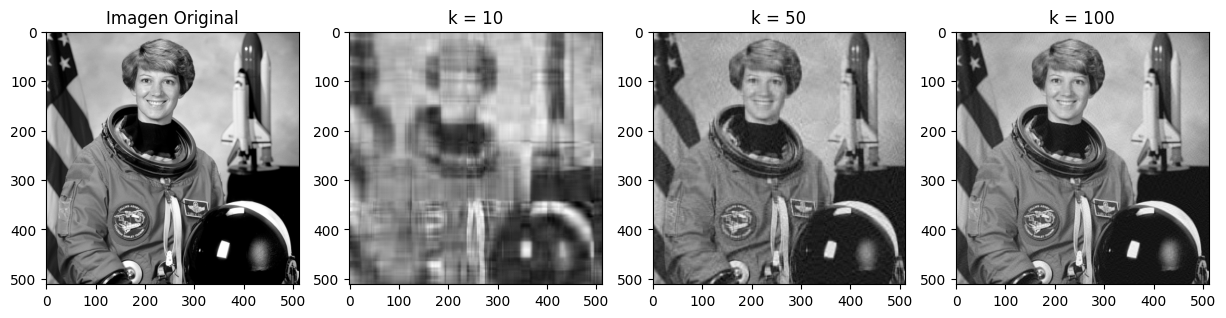

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import data, color

# Cargar imagen de ejemplo en escala de grises
image = color.rgb2gray(data.astronaut())
U, S, VT = svd(image, full_matrices=False)

# Reconstruir la imagen usando solo los primeros k valores singulares
def reconstruir_imagen(U, S, VT, k):
    S_k = np.diag(S[:k])
    return U[:, :k] @ S_k @ VT[:k, :]

# Mostrar la imagen original y las imágenes comprimidas con diferentes valores de k
fig, axes = plt.subplots(1, 4, figsize=(15, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Imagen Original")

for i, k in enumerate([10, 50, 100], start=1):
    imagen_comprimida = reconstruir_imagen(U, S, VT, k)
    axes[i].imshow(imagen_comprimida, cmap="gray")
    axes[i].set_title(f"k = {k}")

plt.show()

La **compresión de imágenes utilizando** la SVD es un enfoque muy util que permite reducir el tamaño de los datos, conservando la mayor cantidad de información relevante. Sin embargo, el proceso varía ligeramente dependiendo de si estamos trabajando con una imagen en **escala de grises** o una imagen en color.

**Imágenes en Escala de Grises**

En el caso de una imagen en escala de grises, cada píxel tiene un solo valor que representa su intensidad de luz (desde negro hasta blanco). Esta imagen puede representarse como una matriz bidimensional (2D), donde las filas y columnas corresponden a la posición de los píxeles y el valor en cada posición es la intensidad de brillo. La compresión de una imagen en escala de grises mediante SVD consiste en aplicar la descomposición directamente sobre esta matriz, lo que permite eliminar los valores singulares menos importantes para reducir la cantidad de datos sin perder demasiada calidad.

**Imágenes en Color**

Por otro lado, una imagen en color se representa utilizando el modelo **RGB** (Rojo, Verde y Azul), donde cada píxel tiene tres valores que corresponden a las intensidades de estos tres colores. Esto implica que una imagen en color no es una simple matriz 2D, sino una matriz tridimensional (3D) que contiene tres canales de color: uno para el rojo, otro para el verde y otro para el azul.

Cuando se aplica la SVD a una imagen en color, se debe procesar **cada canal de manera independiente**. Esto significa que se descompone las matrices correspondientes a los canales rojo, verde y azul por separado, obteniendo tres descomposiciones (una por cada canal). Luego, se truncan los valores singulares de cada canal de manera independiente y, finalmente, se combinan los tres canales comprimidos para reconstruir la imagen en color. Este proceso permite reducir el tamaño de la imagen en color mientras se mantiene la mayor cantidad de información posible en cada canal.

**Diferencias clave**


*   **Escala de grise**s: Se aplica SVD directamente sobre una sola matriz que representa las intensidades de los píxeles.
*   **Color (RGB)**: Se aplica SVD en cada canal de color (Rojo, Verde, Azul) de forma separada, y luego se combinan los canales reconstruidos para formar la imagen comprimida.





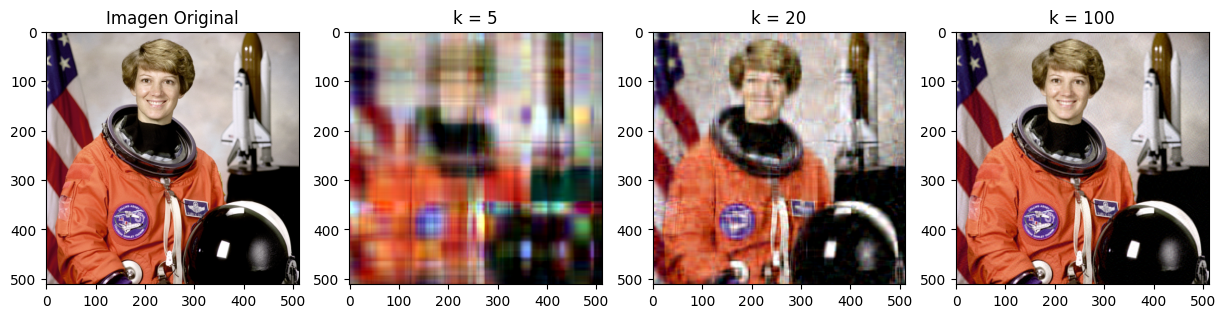

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import data

# Cargar imagen de ejemplo en color (astronauta)
image = data.astronaut()

# Función para aplicar SVD en un canal de color y reconstruir la imagen con k valores singulares
def aplicar_svd_por_canal(image_channel, k):
    U, S, VT = svd(image_channel, full_matrices=False)
    S_k = np.diag(S[:k])  # Matriz diagonal con los k valores singulares
    return U[:, :k] @ S_k @ VT[:k, :]  # Reconstruir el canal con k valores singulares

# Función para aplicar SVD en los tres canales de color
def reconstruir_imagen_color(image, k):
    # Aplicar SVD en cada canal (R, G, B)
    R = aplicar_svd_por_canal(image[:, :, 0], k)
    G = aplicar_svd_por_canal(image[:, :, 1], k)
    B = aplicar_svd_por_canal(image[:, :, 2], k)
    # Combinar los tres canales
    return np.stack((R, G, B), axis=2)

# Mostrar la imagen original y las imágenes comprimidas con diferentes valores de k
fig, axes = plt.subplots(1, 4, figsize=(15, 8))
axes[0].imshow(image)
axes[0].set_title("Imagen Original")

# Reconstruir y mostrar la imagen con diferentes valores de k
for i, k in enumerate([5, 20, 100], start=1):
    imagen_comprimida = reconstruir_imagen_color(image, k)
    axes[i].imshow(np.clip(imagen_comprimida.astype(int), 0, 255))  # Asegurar valores en el rango [0, 255]
    axes[i].set_title(f"k = {k}")

plt.show()



En este ejemplo, la imagen se reconstruye usando solo los primeros $k$ valores singulares más grandes. A medida que incrementamos el valor de $k$, la calidad de la imagen aumenta, pero también lo hace el tamaño de los datos almacenados.

 ### 5.2. Reducción de Dimensionalidad

Otra aplicación clave de la SVD es en la reducción de dimensionalidad. Este enfoque es particularmente útil cuando trabajamos con datos de alta dimensionalidad, como en el análisis de texto, imágenes o grandes conjuntos de datos de características.

La SVD se puede utilizar en conjunto con el **Análisis de Componentes Principales** (PCA), ya que ambos métodos están relacionados. El PCA utiliza la SVD para encontrar los ejes principales en los datos, permitiendo así reducir la dimensionalidad manteniendo la mayor cantidad de información posible.



### 5.3. Sistemas de Recomendación

Los sistemas de recomendación son otra aplicación popular de la SVD. Este tipo de sistemas se utiliza en plataformas como Netflix, Amazon y YouTube para sugerir contenido basado en las preferencias pasadas del usuario.

En este contexto, los datos de interacciones entre usuarios y productos se representan como una matriz, donde las filas corresponden a usuarios y las columnas a productos. La SVD se utiliza para descomponer esta matriz y predecir las preferencias de los usuarios por productos no calificados, generando así recomendaciones.





### 5.4. Filtrado de Datos Ruidosos

Otra aplicación de la SVD es en el filtrado de datos ruidosos. En muchos casos, los datos que recolectamos contienen ruido, lo que puede distorsionar los resultados del análisis. La SVD permite identificar las componentes principales de los datos y eliminar el ruido reduciendo los valores singulares pequeños, que suelen corresponder al ruido.

Este enfoque es útil en áreas como el procesamiento de señales, donde el ruido puede afectar significativamente la calidad de la señal, o en el análisis de datos experimentales donde las mediciones pueden contener errores.

## 6. Ejercicio práctico: Descomposición en Valores Singulares (SVD) manual y validación en Python

En esta sección, se lleva a cabo un ejercicio práctico para calcular manualmente la **descomposición en valores singulares (SVD)** de una matriz, un proceso clave en álgebra lineal para la factorización de matrices. Posteriormente, los resultados se validan mediante el uso de Python para comprobar su precisión. (Ver ejercicio manual en hojas: [5 a 9 hojas escritas.pdf](https://drive.google.com/file/d/1amLkpnfJDWlIkzOEvPEbAm8gEMXk7XfU/view?usp=sharing))

### **Paso 1: Descomposición en valores singulares manualmente**

Dada la matriz $ A $:

$$
A = \begin{pmatrix} 4 & 0 \\ 3 & -5 \end{pmatrix}
$$

Se procedió a calcular su **SVD** manualmente siguiendo estos pasos:

1. **Calcular $ A A^T $ y $ A^T A $**:
   $$
   A A^T = \begin{pmatrix} 4 & 0 \\ 3 & -5 \end{pmatrix} \begin{pmatrix} 4 & 3 \\ 0 & -5 \end{pmatrix} = \begin{pmatrix} 16 & 12 \\ 12 & 34 \end{pmatrix}
   $$
   $$
   A^T A = \begin{pmatrix} 4 & 3 \\ 0 & -5 \end{pmatrix} \begin{pmatrix} 4 & 0 \\ 3 & -5 \end{pmatrix} = \begin{pmatrix} 25 & -15 \\ -15 & 25 \end{pmatrix}
   $$

2. **Encontrar los autovalores y autovectores de \( A A^T \) y \( A^T A \)**:
  
   - Los **autovalores** de $ A^T A $ son $$ \lambda_1 = 40  \\ y \\  \lambda_2 = 10 .$$
   - Los **autovectores** asociados a estos autovalores forman las matrices $ V^T $ y $ U $.

3. **Calcular los valores singulares**:
   Los valores singulares son las raíces cuadradas de los autovalores:
   $$
   \sigma_1 = \sqrt{40} \approx 6.3246, \quad \sigma_2 = \sqrt{10} \approx 3.1623
   $$
   Estos valores se colocan en la **matriz diagonal \( \Sigma \)**:
   $$
   \Sigma = \begin{pmatrix} 6.3246 & 0 \\ 0 & 3.1623 \end{pmatrix}
   $$

4. **Obtener las matrices $ U $ y $ V^T $**:
   Los autovectores de $ A A^T $ y $ A^T A $ proporcionan las matrices ortogonales $ U $ y $ V^T $. Estas son:

   $$
   U = \begin{pmatrix} -0.45 & -0.8 \\ -0.89 & 0.45 \end{pmatrix}, \quad V^T = \begin{pmatrix} -0.7071 & 0.7071 \\ -0.7071 & -0.7071 \end{pmatrix}
   $$

### **Paso 2: Validación con Python**

Para validar estos resultados, se utilizó Python y la librería **NumPy**, que permite calcular la descomposición en valores singulares de manera automática. El código utilizado para la validación fue el siguiente:


In [ ]:
import numpy as np

# Matriz U
U = np.array([[-0.45, -0.89], [-0.89, 0.45]])

# Matriz Sigma (diagonal de valores singulares)
Sigma = np.diag([6.3246, 3.1623])

# Matriz V^T
VT = np.array([[-0.7071, 0.7071], [-0.7071, -0.7071]])

# Reconstruir la matriz A
A_reconstructed = U @ Sigma @ VT
print("El resultado de la matriz reconstruida es:")
# Imprimir la matriz reconstruida
print("Matriz A reconstruida:")
print(A_reconstructed)

El resultado de la matriz reconstruida es:
Matriz A reconstruida:
[[ 4.00255157 -0.02236062]
 [ 2.9739629  -4.986419  ]]


### Paso 3: Código utilizado en Python

El siguiente código de Python realiza la descomposición en valores singulares de la matriz 𝐴 y valida los resultados.

In [ ]:
import numpy as np
# Matriz A original
A = np.array([[4, 0], [3, -5]])
# Calcular la descomposición en valores singulares
U, S, VT = np.linalg.svd(A)
# Mostrar los resultados
print("Matriz U:")
print(U)

print("\nValores singulares (Sigma):")
print(S)

print("\nMatriz V^T:")
print(VT)

# Reconstruir la matriz A
Sigma = np.diag(S)
A_reconstructed = U @ Sigma @ VT

print("\nMatriz A reconstruida:")
print(A_reconstructed)

# Redondear la matriz a 6 decimales
A_rounded = np.round(A_reconstructed, decimals=6)

# Imprimir la matriz reconstruida redondeada
print("Matriz A reconstruida (redondeada):")
print(A_rounded)

Matriz U:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]

Valores singulares (Sigma):
[6.32455532 3.16227766]

Matriz V^T:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

Matriz A reconstruida:
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]
Matriz A reconstruida (redondeada):
[[ 4. -0.]
 [ 3. -5.]]


### **Conclusión del ejercicio**

Este ejercicio demuestra cómo es posible realizar manualmente la **descomposición en valores singulares** de una matriz pequeña, obteniendo resultados. Posteriormente, se validó con el uso de Python, obteniendo resultados coincidentes con mínimas diferencias debidas a la precisión numérica del cálculo en la computadora. (Ya que en el ejercicio manual se redondean los resultados)

El uso de Python facilita la descomposición de matrices más grandes y complejas, asegurando precisión y eficiencia en los cálculos.

### Referencias Bibliográficas
Trefethen, L. N., & Bau, D. (1997). Numerical Linear Algebra. SIAM. [link book](https://www.stat.uchicago.edu/~lekheng/courses/309/books/Trefethen-Bau.pdf)

Strang, G. (2005). Linear Algebra and Its Applications (4ª ed.). Brooks/Cole. [link book](https://vf-tropi.com/linearalgebraanditsapplications.pdf) Cap 6.3 Singular Value Decomposition p.331


### Ejercitacion hojas
[PDF Hojas escritas](https://drive.google.com/file/d/1amLkpnfJDWlIkzOEvPEbAm8gEMXk7XfU/view?usp=sharing)



---

